In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Comparació TE, TEBD1o, TEBD2o

In [3]:
def filetitle(N, U, V, bdim, dt, order, obsval = False):
    if order == 0:
        o2 = "zero"
    elif order == 1:
        o2 = "false"
    else:
        o2 = "true"

    if obsval:
        type = "Other"
    else:
        type = "energy"
    
    title = "codi_TFG/converged/"+type+"/N_" + str(N) +"-U_"+str(U)+"-V_"+str(V)+"-bdim_"+str(bdim)+"-dt_"+str(dt)+"-o2_"+o2+".csv"

    return title

filetitle(4, 10.0, 0.0, 20, 0.01, 0)

'codi_TFG/converged/energy/N_4-U_10.0-V_0.0-bdim_20-dt_0.01-o2_zero.csv'

In [4]:
def get_last(energies):
    return energies[len(energies)-1]

In [5]:
prova1 = [1,2,3,4,5,6,7,8,9]
get_last(prova1)

9

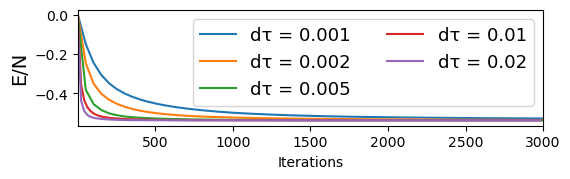

In [6]:
## Scaling with dt

dts = [0.001, 0.002, 0.005, 0.01, 0.02]

realval = -5.36866477490298/10
realval = 0

plt.figure(figsize = (6, 1.5))

for dt in dts:
    title = filetitle(10, 4.0, 0.0, 20, dt, 1)
    energies = np.genfromtxt(title, delimiter=",", usemask=True)
    plt.plot(energies[0], (energies[1]/10-realval), label = "dτ = " + str(dt))

plt.xlim(1, 3000)
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("E/N", fontsize = 14)
plt.legend(ncols = 2, fontsize = 13)
#plt.savefig("timeconv.jpg", format = "jpg", dpi = 600, bbox_inches = "tight")

In [7]:
# Zero order (TE)
regular_TE = np.genfromtxt(filetitle(4, 4.0, 0.0, 20, 0.01, 0), delimiter=",", usemask=True)

# First order TEBD
TEBD1o = np.genfromtxt(filetitle(4, 4.0, 0.0, 20, 0.01, 1), delimiter=",", usemask=True)

# Second order TEBD
TEBD2o = np.genfromtxt(filetitle(4, 4.0, 0.0, 20, 0.01, 2), delimiter=",", usemask=True)

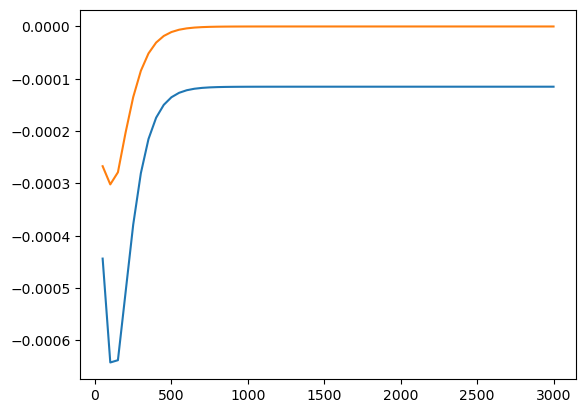

In [8]:
#plt.yscale("log")
plt.plot(TEBD1o[0], (TEBD1o[1]-regular_TE[1])/regular_TE[1], label = "TEBD1o")
plt.plot(TEBD2o[0], (TEBD2o[1]-regular_TE[1])/regular_TE[1], label = "TEBD2o")

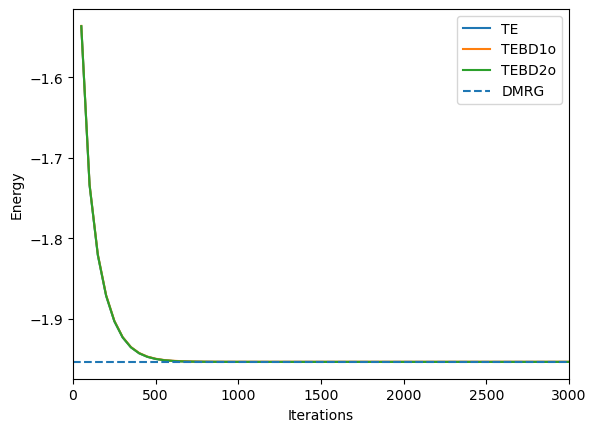

In [9]:
# N = 4, U = 4

E_DMRG = -1.953145308684551

xlimfinal = 3000

#plt.plot()
plt.plot(regular_TE[0], regular_TE[1], label = "TE")
plt.plot(TEBD1o[0], TEBD1o[1], label = "TEBD1o")
plt.plot(TEBD2o[0], TEBD2o[1], label = "TEBD2o")
plt.hlines(E_DMRG, 0, xlimfinal, ls="--", label = "DMRG")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.xlim(0, xlimfinal)
plt.show()

comparar per sistemes grans: error per bdim=4 amb error per bdim=30
DE = E(bdim=petit) - E(bdim=gran)

representant estat amb molts menys autovalors, quests tenen una contribució molt petita

A BOND DIMENSION OF 20 IS ENOUGH TO SIMULATE THE SYSTEM


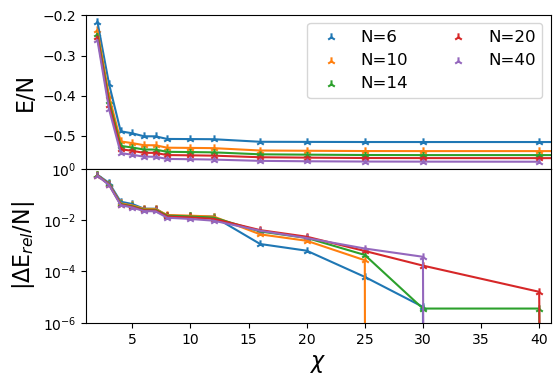

In [10]:
bdims = [2, 3, 4, 5, 6, 7, 8, 10, 12, 16, 20, 25, 30, 40, 60, 80]
bdims2 = [2, 3, 4, 5, 6, 7, 8, 10, 12, 16, 20, 25, 30, 40]#, 60, 80]
Ns = [6, 10, 14, 20, 40]
DMRG_ENERGIES = []
#colours = ["lightpink", "palevioletred", "hotpink", "mediumvioletred"]
#colours = ["darksalmon", "chocolate", "red", "brown"]



# Generate figure
fig, axs = plt.subplots(2, 1, sharex = True, figsize = (6,4))
fig.subplots_adjust(hspace = 0)


for ene in Ns:
    conv_enes = []

    if ene == 40:
        bdim2 = bdims2
    else:
        bdim2 = bdims
    
    for item in bdim2:
        title = filetitle(ene, 4.0, 0.0, item, 0.01, 1)
        energies = np.genfromtxt(title, delimiter=",", usemask=True)
        conv_energy = get_last(energies[1]/ene)
        conv_enes.append(conv_energy)
    i = Ns.index(ene)
    conv_enes = np.array(conv_enes)
    axs[0].scatter(bdim2, conv_enes, label = "N="+str(ene), marker = "2")
    axs[0].plot(bdim2, conv_enes)
    enref = get_last(conv_enes)
    axs[1].scatter(bdim2, abs((conv_enes - enref)/enref), label = "N="+str(ene), marker = "2")
    axs[1].plot(bdim2, abs((conv_enes - enref)/enref))

axs[1].set_yscale("log")
axs[1].set_xlabel("$\chi$", fontsize = 16)
axs[0].set_ylabel("E/N", fontsize = 16)
axs[1].set_ylabel("|$\Delta$E$_{rel}$/N|", fontsize = 16)
axs[0].legend(fontsize = 12, ncols = 2)
axs[1].set_xlim(1, 41)
axs[1].set_ylim(1e-6, 1)
#plt.yscale("log")
#bethe_en = -0.577
#plt.hlines(bethe_en, 0, 30, ls="--", label = "Bethe ansatz energy")
#plt.xlabel("Bond dimension")
#plt.ylabel("Energy/N")
#plt.xlim(0,30)
#plt.ylim(1e-5, 1)
#plt.legend(fontsize = 14)
print("A BOND DIMENSION OF 20 IS ENOUGH TO SIMULATE THE SYSTEM")
#plt.savefig("AREALAW1.jpg", format = "jpg", dpi = 600, bbox_inches = "tight")

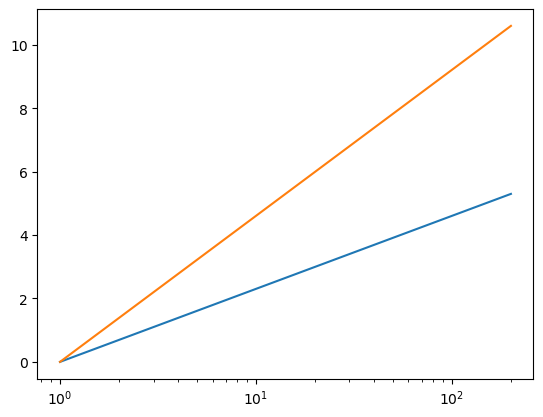

In [11]:
x = np.linspace(1, 200, 1000)

plt.plot(x, np.log(x))
plt.plot(x, 2*np.log(x))
plt.xscale("log")

next step:
- E/N as a function of N, comparing with bethe ansatz
- <Nupdn> as a function of U: Mott insulator transition
- 

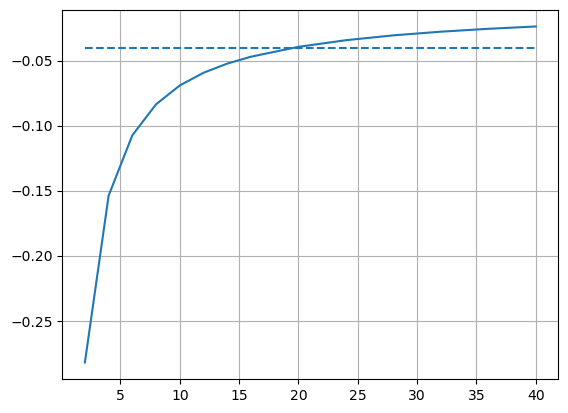

In [12]:
ens = [2, 4, 6, 8, 10, 12, 14, 16, 20, 24, 28, 32, 36, 40]
conv_enes = []
obsval_mean = []
obsval_std = []


for ene in ens:
    title = filetitle(ene, 4.0, 0.0, 20, 0.01, 1)
    title_obs = filetitle(ene, 4.0, 0.0, 20, 0.01, 1, obsval = True)
    energies = np.genfromtxt(title, delimiter=",", usemask=True)
    obsval = np.genfromtxt(title_obs, delimiter=",", usemask=True)
    conv_energy = get_last(energies[1]/ene)
    obs_mean = get_last(obsval[1])
    obs_std = get_last(obsval[2])
    conv_enes.append(conv_energy)
    obsval_mean.append(obs_mean)
    obsval_std.append(obs_std)
    
conv_enes = np.array(conv_enes)
bethe_en = -0.577
#plt.plot(ens, obsval_mean)
#plt.errorbar(ens, obsval_mean, yerr = obsval_std)
#plt.show()
#plt.plot(ens, conv_enes)
plt.plot(ens, (conv_enes-bethe_en)/bethe_en)
#plt.hlines(bethe_en, 2, 40, ls="--", label = "Bethe ansatz energy")
plt.grid()
plt.hlines(-0.04, 2, 40, ls="--", label = "1% relative error")

### For N=20, U sweep from 0 to 10

(0.0, 25.0)

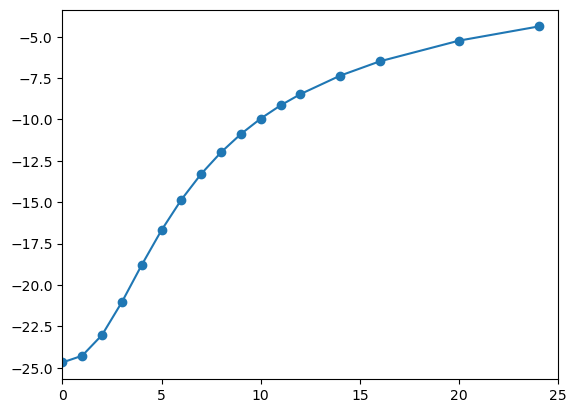

In [13]:
kin_enes = np.genfromtxt('codi_TFG/processed/kinetic_energy.csv', delimiter=',')

plt.plot(kin_enes[0], kin_enes[1])
plt.scatter(kin_enes[0], kin_enes[1])
plt.xlim(0, 25)

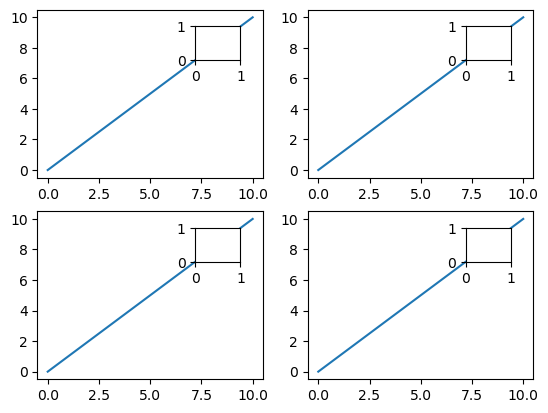

In [14]:
fig, axes = plt.subplots(2,2)

for ax in axes.flat:
    ax.plot(np.arange(11),np.arange(11))

    ins = ax.inset_axes([0.7,0.7,0.2,0.2])

plt.show()

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 14. 16. 20. 24.]


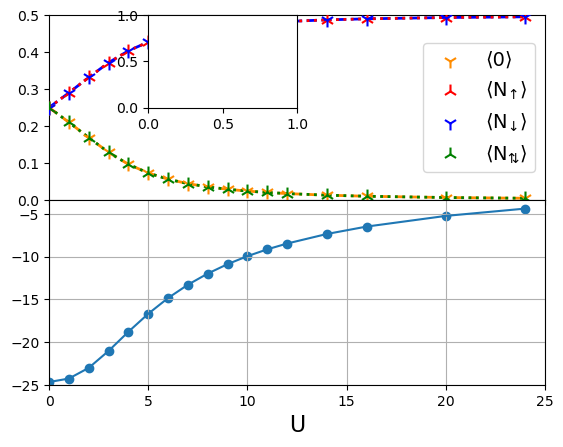

In [15]:
#Us = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 14.0, 16.0, 20.0, 24.0]
conv_enes = []
obsval_mean = []
obsval_std = []


occ_amps = np.genfromtxt('codi_TFG/processed/occ_amplitudes.csv', delimiter=',')
Us = occ_amps[0]
print(Us)

names = ["⟨0⟩", "⟨N$_{↑}$⟩", "⟨N$_{↓}$⟩", "⟨N$_{⇅}$⟩"]
colours = ["darkorange", "red", "blue", "green"]


# Define two-plot figure
fig, axs = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace = 0)


# Emp
for i in range(4):
    j = 1 + 2*i
    if i % 2 == 0:
        mrk = "1"
        ls = "--"
        zord = 1
    else:
        mrk = "2"
        ls = ":"
        zord = 2
    axs[0].scatter(Us, occ_amps[j], label = names[i], marker = mrk, s = 100, zorder = 5, color = colours[i])
    axs[0].plot(Us, occ_amps[j], ls = ls, zorder = zord, lw = 2, color = colours[i])
    #plt.errorbar(Us, occ_amps[j], occ_amps[j+1])


axs[1].plot(kin_enes[0], kin_enes[1])
axs[1].scatter(kin_enes[0], kin_enes[1])

#plt.scatter(Us, obsval_mean, marker = "x")
#plt.plot(Us, obsval_mean, "-o")
#plt.errorbar(Us, obsval_mean, yerr = obsval_std)
#plt.show()
#plt.plot(ens, conv_enes)
#plt.plot(ens, (conv_enes-bethe_en)/bethe_en)
#plt.hlines(bethe_en, 2, 40, ls="--", label = "Bethe ansatz energy")
plt.xlim(0, 25)
axs[0].set_ylim(0, 0.5)
plt.xlabel("U", fontsize = 16)
#plt.ylabel("⟨$N_{⇅}$⟩", fontsize = 16)
axs[0].legend(fontsize = 14, loc = "center right")
axs[1].set_ylim(bottom = -25)
prova1 = axs[0].inset_axes([0.2, 0.5, 0.3, 0.5])
plt.grid()
#plt.show()
#plt.hlines(-0.04, 2, 40, ls="--", label = "1% relative error")
#plt.savefig("Nupdn_expect_1.jpg", format = "jpg", dpi = 600, bbox_inches = "tight")

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 14. 16. 20. 24.]


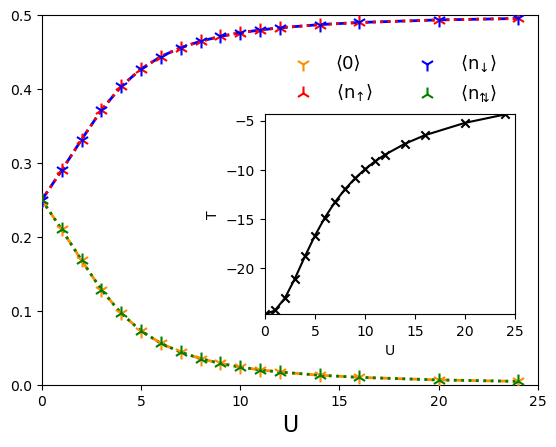

In [18]:
#Us = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 14.0, 16.0, 20.0, 24.0]
conv_enes = []
obsval_mean = []
obsval_std = []


occ_amps = np.genfromtxt('codi_TFG/processed/occ_amplitudes.csv', delimiter=',')
Us = occ_amps[0]
print(Us)

names = ["⟨0⟩", "⟨n$_{↑}$⟩", "⟨n$_{↓}$⟩", "⟨n$_{⇅}$⟩"]
colours = ["darkorange", "red", "blue", "green"]


# Define two-plot figure
fig, axs = plt.subplots(1, 1, sharex = True)
fig.subplots_adjust(hspace = 0)


# Emp
for i in range(4):
    j = 1 + 2*i
    if i % 2 == 0:
        mrk = "1"
        ls = "--"
        zord = 1
    else:
        mrk = "2"
        ls = ":"
        zord = 2
    axs.scatter(Us, occ_amps[j], label = names[i], marker = mrk, s = 100, zorder = 5, color = colours[i])
    axs.plot(Us, occ_amps[j], ls = ls, zorder = zord, lw = 2, color = colours[i])
    #plt.errorbar(Us, occ_amps[j], occ_amps[j+1])


#axs[1].plot(kin_enes[0], kin_enes[1])
#axs[1].scatter(kin_enes[0], kin_enes[1])

#plt.scatter(Us, obsval_mean, marker = "x")
#plt.plot(Us, obsval_mean, "-o")
#plt.errorbar(Us, obsval_mean, yerr = obsval_std)
#plt.show()
#plt.plot(ens, conv_enes)
#plt.plot(ens, (conv_enes-bethe_en)/bethe_en)
#plt.hlines(bethe_en, 2, 40, ls="--", label = "Bethe ansatz energy")

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.xlim(0, 25)
axs.set_ylim(0, 0.5)
plt.xlabel("U", fontsize = 16)
#plt.ylabel("⟨$N_{⇅}$⟩", fontsize = 16)
#axs.legend(fontsize = 14, loc = (20, 0.4))
axs.legend(bbox_to_anchor=(0.95, 0.94), ncols=2, fontsize = 13, frameon=False)
#legend = axs.legend()
#legend.get_frame().set_edgecolor('1.0')
#axs[1].set_ylim(bottom = -25)
#inset_ax = inset_axes(axs, width="50%", height=2, loc="center right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))
inset_ax = inset_axes(axs, width="50%", height=2, bbox_to_anchor=(60, 130, 500, 200))
inset_ax.plot(kin_enes[0], kin_enes[1], color = "black")
inset_ax.scatter(kin_enes[0], kin_enes[1], color = "black", marker = "x")
inset_ax.set_ylabel("T")
inset_ax.set_xlabel("U")
inset_ax.set_xlim(0, 25)
inset_ax.set_ylim(min(kin_enes[1]), max(kin_enes[1]))
#plt.show()
#plt.hlines(-0.04, 2, 40, ls="--", label = "1% relative error")
#plt.savefig("Nupdn_expect_2.jpg", format = "jpg", dpi = 800, bbox_inches = "tight")

#### El mateix, per N=10

ValueError: x and y must have same first dimension, but have shapes (17,) and (0,)

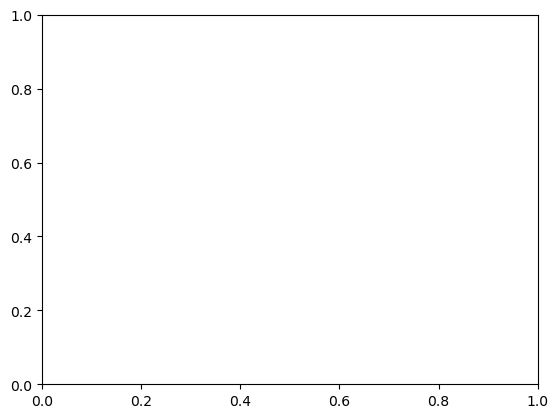

In [17]:
Us = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 14.0, 16.0, 20.0, 24.0]
conv_enes2 = []
obsval_mean2 = []
obsval_std2 = []
ene = 10


for U in Us:
    title = filetitle(ene, U, 0.0, 20, 0.01, 1)
    title_obs = filetitle(ene, U, 0.0, 20, 0.01, 1, obsval = True)
    energies = np.genfromtxt(title, delimiter=",", usemask=True)
    obsval = np.genfromtxt(title_obs, delimiter=",", usemask=True)
    conv_energy = get_last(energies[1]/ene)
    obs_mean = get_last(obsval[1])
    obs_std = get_last(obsval[2])
    conv_enes2.append(conv_energy)
    obsval_mean2.append(obs_mean)
    obsval_std2.append(obs_std)
    
conv_enes2 = np.array(conv_enes2)
# bethe_en = -0.577
plt.plot(Us, obsval_mean)
plt.errorbar(Us, obsval_mean, yerr = obsval_std)
plt.plot(Us, obsval_mean2)
plt.errorbar(Us, obsval_mean2, yerr = obsval_std2)
#plt.show()
#plt.plot(ens, conv_enes)
#plt.plot(ens, (conv_enes-bethe_en)/bethe_en)
#plt.hlines(bethe_en, 2, 40, ls="--", label = "Bethe ansatz energy")
plt.xlim(0)
plt.ylim(0, 0.25)
plt.grid()
#plt.hlines(-0.04, 2, 40, ls="--", label = "1% relative error")

### TF Mott insulator - CDW

In [ ]:
deltas = np.genfromtxt('codi_TFG/processed/CDW_vals.csv', delimiter=',')
UVs = np.genfromtxt('codi_TFG/processed/CDW_V.csv', delimiter=',')
Us = [4.0, 6.0, 8.0, 10.0, 15.0, 20.0]


def numder(xvals, yvals):
    N = len(xvals)
    xnew, ynew = [], []

    for i in range(N-1):
        ynew.append((yvals[i+1] - yvals[i])/(xvals[i+1] - xvals[i]))
        xnew.append((xvals[i+1] + xvals[i])/2)
    return xnew, np.array(ynew)



# Define two-plot figure
fig, axs = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace = 0)


for i in range(6):
    U = Us[i]
    axs[0].plot(UVs[i], deltas[i])
    axs[0].scatter(UVs[i], deltas[i], label = "U="+str(int(U)), marker = "2")
    xnew, ynew = numder(UVs[i], deltas[i])
    axs[1].plot(xnew, ynew/U, lw = 2, label = "U="+str(U))
    axs[1].scatter(xnew, ynew/U, lw = 2, label = "U="+str(U), marker = "2")
    #axs[1].scatter(xnew, ynew/U, lw = 2)

plt.xlabel("V/U", fontsize = 14)
axs[0].set_ylabel("$\Delta_{CDW}$", fontsize = 16)
axs[1].set_ylabel("d$\Delta_{CDW}$/dV", fontsize = 14)

axs[0].legend(ncol = 2, loc = "lower left", fontsize = 12)
axs[0].set_ylim(top = 0)
axs[1].set_ylim(-0.03, 0)
axs[1].set_xticks(np.linspace(0, 1, 11))
axs[0].set_xlim(0, 1)
plt.vlines(0.5, -1, 1, ls = "--", color = "black")



axs[0].vlines(0.5, -0.05, 0, ls = "--", color = "black")
axs[1].vlines(0.5, -0.05, 0, ls = "--", color = "black")
plt.xlabel("V/U", fontsize = 16)

#plt.savefig("CDW_transition.jpg", format = "jpg", dpi = 700, bbox_inches = "tight")

---
# P2 MINT

In [ ]:
Vs = [2.0796, 5.601, 8.399, 11.209, 14.088, -2.799, -5.603, -8.4, -11.209, -14.085]
Is = [20, 40, 60, 80, 100, -20, -40, -60, -80, -100]

def res(I):
    return I * 0.1401 - 0.07

Vs = np.sort(Vs)
Is = np.sort(Is)


plt.figure(figsize = (6,3))
plt.xlabel("I (mA)", fontsize = 14)
plt.ylabel("V (mV)", fontsize = 14)
plt.grid()
plt.xlim(-110, 110)
plt.ylim(-16, 16)
plt.scatter(Is, Vs, color = "mediumvioletred")
plt.plot(Is, res(Is), ls = "--", color = "palevioletred")

#plt.savefig("MINT_P2.jpg", format = "jpg", dpi = 700, bbox_inches = "tight")

# POTENCIA - PONT EN H

In [ ]:
Kv = 8.68 # mV/rpm
Ki = 8.91 # N * cm/A
R = 5 # Ohm
b = 1.035e-3 # 
J = 2.5e-4 # N*m/(rad/s^2)

def transf_w(V, s):
    return 

In [ ]:
d = 4
N = 10
bdim = 20
trad = 4**N

tns = d * bdim * 2
for i in range(N-2):
    tns += d * bdim ** 2


print("TRADICIONAL: ", trad)
print("TNS: ", tns)